Dependencies

In [151]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Performing EDA on the data collected through REST APIs

In [152]:
df = pd.read_excel("night_clubs_data.xlsx")

In [153]:
df.head()

,Club Name,Rating,Review,Open Time,Close Time,Latitude,Longitude
0,The Electric Beat,4.6,What an electric atmosphere! The DJ kept the d...,22:00:00,03:00:00,53.2716,-9.0572
1,The Electric Beat,4.6,"The music at The Electric Beat was pumping,and...",22:00:00,03:00:00,53.2716,-9.0572
2,The Electric Beat,4.6,"I've been to many clubs,but The Electric Beat ...",22:00:00,03:00:00,53.2716,-9.0572
3,The Electric Beat,4.6,The Electric Beat has the best sound system. T...,22:00:00,03:00:00,53.2716,-9.0572
4,The Electric Beat,4.6,The Electric Beat is the place where I forget ...,22:00:00,03:00:00,53.2716,-9.0572


In [154]:
Unq_club_names = df['Club Name'].unique()
print('Number of Unique Club names:', len(Unq_club_names))
for names in Unq_club_names:
    print(names)

Number of Unique Club names: 17
The Electric Beat
The Midnight Groove
The Groovy Den
Galway Rhythms Club
Galway Beats Club
Galway Vibes Club
The Dough Bros
Galaxy Club
Cava Bodega
Kai Restaurant
The Neon Lounge
The Pulse Club
Club Vibe
The Groove Lounge
The Midnight Rhythm
The Enchanted Beats
Galactic Grooves


In [155]:
# average length of the review column
reviews = df['Review']
avg_len = sum(len(s) for s in reviews)/ len(reviews)
print(f'Average length of the reiews is {avg_len} chars')

Average length of the reiews is 78.30635838150289 chars


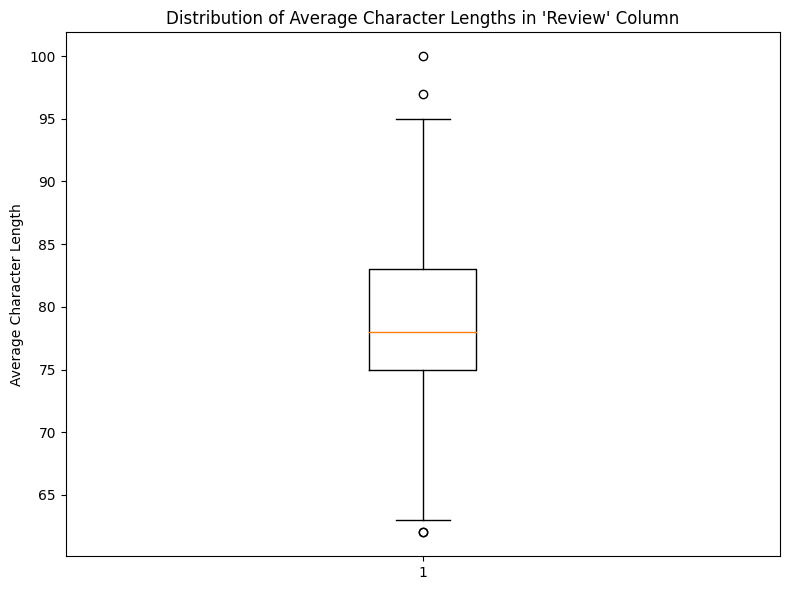

In [156]:
#calculating avg char length per column
avg_lens = df["Review"].apply(len)

# Box plot to visualize the distribution of average character lengths
plt.figure(figsize=(8, 6))
plt.boxplot(avg_lens)
plt.title("Distribution of Average Character Lengths in 'Review' Column")
plt.ylabel("Average Character Length")
plt.tight_layout()
plt.show()

In [157]:
# baseline rating
avg_rating = df['Rating'].mean()
min_rating = df['Rating'].min()
max_rating = df['Rating'].max()
print(f'Average Rating:{avg_rating}, Minimum Rating:{min_rating}, Maximum rating:{max_rating}')

Average Rating:4.580732177263968, Minimum Rating:4.2, Maximum rating:4.9


In [158]:
#avg open and closing times

#Langchain part

Using langchain to setup LLMs. The idea here is use to train llm on my data. Once that is done I can use LLMs for Question-Answering

In [159]:
!pip install langchain

In [160]:
!pip install Openai

In [161]:
import os
os.environ["OPENAI_API_KEY"] = ""

Using Open AI first

In [162]:
from langchain.llms import OpenAI

In [163]:
llm = OpenAI(model_name="text-davinci-003")

In [164]:
our_query = "What is the currency of India?"
completion = llm(our_query)

KeyboardInterrupt: ignored

Checking if the pipeline is setup and running

In [165]:
print(completion)

rupee


#Using Huggingface

In [166]:
!pip install huggingface_hub

In [167]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = ""

In [168]:
from langchain.llms import HuggingFaceHub

In [169]:
# using table question answering
llm = HuggingFaceHub(repo_id = "google/flan-t5-large")

In [170]:
# The LLM takes a prompt as an input and outputs a completion
our_query = "What is the currency of India?"
completion = llm(our_query)

Checking if the pipeline is setup and running

In [171]:
print(completion)

rupee


#Using Tranformers from Huggingface
Utilizing models tained on Question-Answering directly to see if they can answer all the questions related to pubs.

In [172]:
!pip install transformers

In [173]:
from transformers import pipeline

In [174]:
df_aggregated = df.groupby('Club Name').agg({
    'Review': ' '.join,
    'Rating': 'mean',
    'Open Time': 'first',
    'Close Time': 'first',
    'Latitude': 'first',
    'Longitude': 'first'
}).reset_index()
df_aggregated

,Club Name,Review,Rating,Open Time,Close Time,Latitude,Longitude
0,Cava Bodega,Cava Bodega serves the most delightful tapas i...,4.6,12:00:00,22:00:00,53.2725,-9.0513
1,Club Vibe,Club Vibe has the best dance floor in Galway. ...,4.6,22:30:00,03:00:00,53.2727,-9.0498
2,Galactic Grooves,Galactic Grooves is out of this world! The spa...,4.5,22:30:00,03:30:00,53.2705,-9.0550
3,Galaxy Club,Galaxy Club is the ultimate party destination ...,4.7,22:00:00,03:00:00,53.2752,-9.0525
4,Galway Beats Club,Galway Beats Club is the ultimate party destin...,4.7,22:00:00,04:00:00,53.2739,-9.0530
5,Galway Rhythms Club,Galway Rhythms Club is a haven for music enthu...,4.4,22:00:00,03:30:00,53.2741,-9.0560
6,Galway Vibes Club,Galway Vibes Club is the place to be for a nig...,4.5,21:00:00,03:00:00,53.2745,-9.0545
7,Kai Restaurant,Kai Restaurant offers a culinary experience li...,4.9,12:30:00,22:00:00,53.2705,-9.0578
8,The Dough Bros,The Dough Bros serves the best pizza in Galway...,4.8,11:00:00,22:00:00,53.2740,-9.0540
9,The Electric Beat,What an electric atmosphere! The DJ kept the d...,4.6,22:00:00,03:00:00,53.2716,-9.0572


In [175]:

table = df_aggregated.astype(str)
question = "What is galway beats club famous for?"

In [176]:
tqa = pipeline(task="table-question-answering", model="google/tapas-large-finetuned-wtq")

In [177]:
answer = tqa(table=table, query=question)

In [178]:
print(answer['answer'])

Galway Beats Club is the ultimate party destination. The beats were infectious! I had a fantastic time at Galway Beats Club. The dance floor was on fire! Galway Beats Club knows how to get the crowd grooving. A night to remember! The energy at Galway Beats Club is electric. I danced till dawn! Galway Beats Club's music selection is top-notch. The DJs are fantastic! Galway Beats Club is the place to be for a night of pure musical euphoria. The beats at Galway Beats Club kept me moving all night long. What a vibe! Galway Beats Club's ambiance is mesmerizing. I couldn't stop dancing! Galway Beats Club is a music lover's dream. The dance floor is magnetic! I danced my heart out at Galway Beats Club. The party was epic! Galway Beats Club is where the city's night comes alive. Unforgettable! The music at Galway Beats Club is diverse and electrifying. Loved every second! Galway Beats Club's late-night parties are legendary. I danced till sunrise! Galway Beats Club is the heart of the city's n

In [179]:
question = "What is opening time of the groovy den?"
answer = tqa(table=table, query=question)
print(answer['answer'])

20:30:00


In [180]:
question = "What is the best pub for cheap beer"
answer = tqa(table=table, query=question)
print(answer['answer'])

The Groovy Den


In [181]:
question = "Give me 5 best pubs where the mood is uplifitng"
answer = tqa(table=table, query=question)
print(answer['answer'])

The Dough Bros


As we can conclude that the model is not performing up to mark as we cannot see the output as a list of 5 pubs

In [182]:
#Using question answering models from hugging face

In [183]:
#from transformers import pipeline

In [184]:
qa_model = pipeline("question-answering")
question = "Give me 5 best pubs where the mood is uplifitng"
context = df_aggregated.astype(str)
qa_model(question = question, context = context)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


ValueError: ignored

#Using Embedding based search for semantic search

Using Pinecone/FAISS to achive simalirity based searching


In [ ]:
!pip install pinecone-client

In [185]:

# Import Pinecone client

import pinecone
from langchain.vectorstores import Pinecone

# Initialize Pinecone
pinecone.init(
    api_key = '',
    environment= 'gcp-starter'
)

In [186]:
pip install sentence_transformers

In [187]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

df_aggregated['embeddings']=df.apply(lambda row: embeddings.embed_query(row['Review']),axis=1)


In [188]:
# Create list with review texts

texts= df_aggregated['Review'].tolist()
#texts

In [189]:
# Send embedding vectors to Pinecone with Langchain

vstore = Pinecone.from_texts(texts, embeddings, index_name='pubcrawl')

In [190]:
# Do a basic vector similarity search

query = "Best pub in Galway with drinks"
result = vstore.similarity_search(query)
print(result)


[Document(page_content="Club Vibe has the best dance floor in Galway. The beats had me dancing all night! I had an amazing time at Club Vibe. The music and atmosphere were electric! Club Vibe's DJs know how to keep the crowd entertained. A night full of energy! The neon lights at Club Vibe add to the vibrant and lively ambiance. A top-notch club! I loved the variety of music at Club Vibe. The perfect place to dance the night away! Club Vibe's cocktails are fantastic. Great drinks to complement the night out! The dance floor at Club Vibe is spacious and energetic. A fantastic place to party! I had a fantastic time at Club Vibe. The club's energy is contagious! Club Vibe's late-night menu satisfied my post-party cravings. Delicious food! The staff at Club Vibe were friendly and attentive. Great service all night! I can't wait to go back to Club Vibe. A memorable night out with friends! Club Vibe's party vibes are unmatched. Always a great time on the dance floor! The neon-themed decor at

In [191]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(model_name="gpt-3.5-turbo",temperature=0.0)
review_chain = RetrievalQA.from_chain_type(llm=chat, chain_type="stuff", retriever=vstore.as_retriever())

In [192]:
q="""
The reviews you see are for all the pubs in galway.
I want to predict 5 best pubs with better ambience
"""

result=review_chain.run(q)
print(result)

KeyboardInterrupt: ignored

In [211]:
df_rem =df_aggregated.rename(columns={'embeddings':'values','Club Name':'id'})
data=df_rem[['id','values']].to_dict(orient='records')
df_rem

,id,Review,Rating,Open Time,Close Time,Latitude,Longitude,values
0,Cava Bodega,Cava Bodega serves the most delightful tapas i...,4.6,12:00:00,22:00:00,53.2725,-9.0513,"[-0.049587856978178024, -0.05622922256588936, ..."
1,Club Vibe,Club Vibe has the best dance floor in Galway. ...,4.6,22:30:00,03:00:00,53.2727,-9.0498,"[-0.07990720868110657, -0.07649605721235275, -..."
2,Galactic Grooves,Galactic Grooves is out of this world! The spa...,4.5,22:30:00,03:30:00,53.2705,-9.0550,"[-0.04047183692455292, -0.013288295827805996, ..."
3,Galaxy Club,Galaxy Club is the ultimate party destination ...,4.7,22:00:00,03:00:00,53.2752,-9.0525,"[-0.05381782352924347, -0.019593292847275734, ..."
4,Galway Beats Club,Galway Beats Club is the ultimate party destin...,4.7,22:00:00,04:00:00,53.2739,-9.0530,"[-0.07348667830228806, -0.002044281456619501, ..."
5,Galway Rhythms Club,Galway Rhythms Club is a haven for music enthu...,4.4,22:00:00,03:30:00,53.2741,-9.0560,"[-0.04952182248234749, 0.012412277981638908, 0..."
6,Galway Vibes Club,Galway Vibes Club is the place to be for a nig...,4.5,21:00:00,03:00:00,53.2745,-9.0545,"[-0.03827110677957535, -0.005803256295621395, ..."
7,Kai Restaurant,Kai Restaurant offers a culinary experience li...,4.9,12:30:00,22:00:00,53.2705,-9.0578,"[-0.05899966135621071, 0.021949348971247673, -..."
8,The Dough Bros,The Dough Bros serves the best pizza in Galway...,4.8,11:00:00,22:00:00,53.2740,-9.0540,"[-0.08863203972578049, -0.022888220846652985, ..."
9,The Electric Beat,What an electric atmosphere! The DJ kept the d...,4.6,22:00:00,03:00:00,53.2716,-9.0572,"[-0.06284484267234802, -0.013696369715034962, ..."


In [212]:
# Create the Pinecone index
# Create the Pinecone index

#pinecone.create_index(name='pubcrawl', metric='euclidean', dimension=768)
index = pinecone.Index('pubcrawl')

In [213]:

# Upload the data in batches of 50

from tqdm.auto import tqdm

for i in tqdm(range(0, len(data), 50)):
    j= i + 50
    if j > len(data):
        j = len(data)
    batch = data[i: j]
    index.upsert(vectors=batch)


  0%|          | 0/1 [00:00<?, ?it/s]

In [216]:
# Run a filtered similarity search

query=embeddings.embed_query("best pubs in galway for drinks")
results = index.query(queries=query, top_k=100, filter={'rating': {'$eq': 4.0}})
print(results)


ValueError: ignored